In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [36]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, Float, Date
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text, func

In [37]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [38]:
# Reflect the database tables into a set of classes
# View all of the classes that automap found

Base = automap_base()
Base.prepare(autoload_with = engine)
Base.classes.keys()

['station', 'measurement']

In [39]:
Station = Base.classes.station

In [40]:
Measurement = Base.classes.measurement

In [41]:
session = Session(engine)

In [42]:
inspector = inspect(engine)

In [44]:
inspector.get_table_names()

['measurement', 'station']

In [45]:
for x in inspector.get_columns('station'):
    print(x["name"])

id
station
name
latitude
longitude
elevation


In [46]:
for x in inspector.get_columns('measurement'):
    print(x["name"])

id
station
date
prcp
tobs


In [30]:
# Define classes for the reflected tables
class Station:
    def __init__(self, id, station, name, latitude, longitude, elevation):
        self.id = id
        self.station = station
        self.name = name
        self.latitude = latitude
        self.longitude = longitude
        self.elevation = elevation

class Measurement:
    def __init__(self, id, station, date, prcp, tobs):
        self.id = id
        self.station = station
        self.date = date
        self.prcp = prcp
        self.tobs = tobs

In [31]:
# Create a session
session = Session(engine)

In [32]:
conn_sqlite = engine.connect()

In [47]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [48]:
#most recent date in the dataset

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [51]:
session.query(Measurement.date).filter(Measurement.date < '2017-08-23').all()

[('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01-10',),
 ('2010-01-11',),
 ('2010-01-12',),
 ('2010-01-14',),
 ('2010-01-15',),
 ('2010-01-16',),
 ('2010-01-17',),
 ('2010-01-18',),
 ('2010-01-19',),
 ('2010-01-20',),
 ('2010-01-21',),
 ('2010-01-22',),
 ('2010-01-23',),
 ('2010-01-24',),
 ('2010-01-25',),
 ('2010-01-26',),
 ('2010-01-27',),
 ('2010-01-28',),
 ('2010-01-30',),
 ('2010-01-31',),
 ('2010-02-01',),
 ('2010-02-03',),
 ('2010-02-04',),
 ('2010-02-05',),
 ('2010-02-06',),
 ('2010-02-07',),
 ('2010-02-08',),
 ('2010-02-09',),
 ('2010-02-11',),
 ('2010-02-12',),
 ('2010-02-13',),
 ('2010-02-14',),
 ('2010-02-15',),
 ('2010-02-16',),
 ('2010-02-17',),
 ('2010-02-19',),
 ('2010-02-20',),
 ('2010-02-21',),
 ('2010-02-22',),
 ('2010-02-23',),
 ('2010-02-24',),
 ('2010-02-25',),
 ('2010-02-26',),
 ('2010-02-28',),
 ('2010-03-01',),
 ('2010-03-02',),
 ('2010-03-03',),
 ('2010-03

In [52]:
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [55]:
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [56]:
recent_date

('2017-08-23',)

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = dt.date(2017,8,23) -dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [67]:
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= query_date)\
    .all()

In [68]:
precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [69]:
# Create a DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Set the index to the date column
precipitation_df.set_index('Date', inplace=True)

# Sort the DataFrame by date
precipitation_df.sort_index(inplace=True)


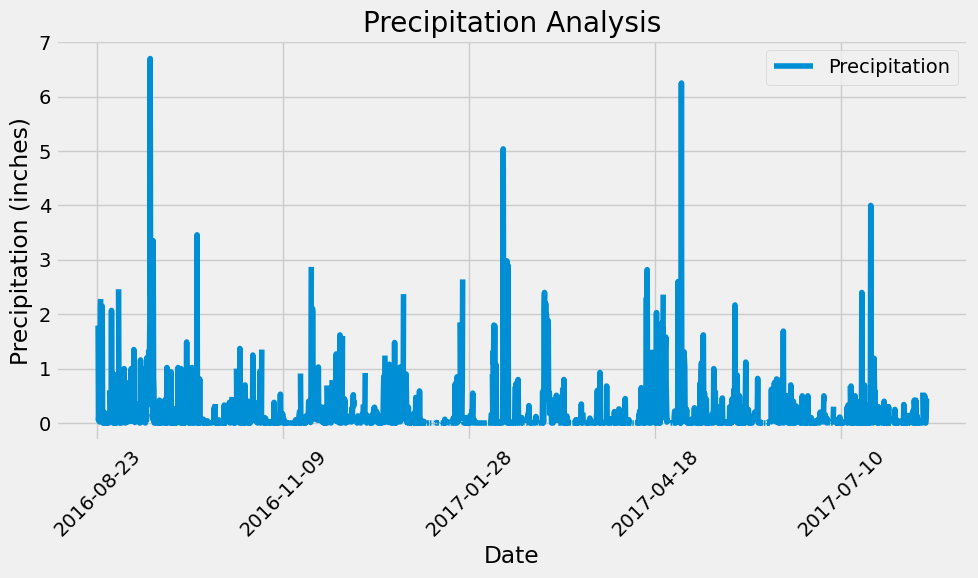

In [70]:
# Plot the results
precipitation_df.plot(y='Precipitation', title="Precipitation Analysis", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
# Print summary statistics
precipitation_stats = precipitation_df.describe()
print(precipitation_stats)


       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


In [72]:
# Calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()

In [78]:
total_stations

9

In [82]:
# List the stations and observation counts in descending order
station_activity = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .first()

In [84]:
station_activity = session.query(Measurement.station, func.count(Measurement.station)) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Get the station ID with the most observations
most_active_station = station_activity[0]
most_active_station

('USC00519281', 2772)

In [90]:
most_active_station_id = 'USC00519281'

In [92]:
temperature_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
    .filter(Measurement.station == most_active_station_id) \
    .all()

In [93]:
# Extract the temperature values
min_temp, max_temp, avg_temp = temperature_data[0]
min_temp, max_temp, avg_temp

(54.0, 85.0, 71.66378066378067)

In [76]:
# Query the last 12 months of TOBS data for the most active station
tobs_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == most_active_station)\
    .filter(Measurement.date >= query_date)\
    .all()


In [94]:
tobs_data

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

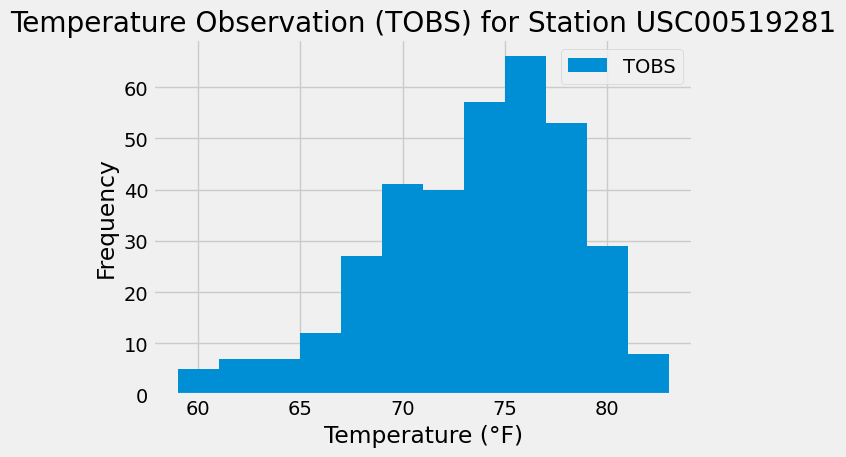

In [77]:
# Create a DataFrame for TOBS data
tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'Temperature'])

# Plot the histogram
plt.hist(tobs_df['Temperature'], bins=12, label='TOBS')
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title(f"Temperature Observation (TOBS) for Station {most_active_station}")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [95]:
# Close Session
session.close()